In [1]:
from utils_ModelNet import prepare_for_learning
from models import build_point_net

Using TensorFlow backend.


In [2]:
input_dir = "ModelNet10"
n = 4096
epochs = 10
batch_size = 32

{0: 'bathtub', 1: 'bed', 2: 'chair', 3: 'desk', 4: 'dresser', 5: 'monitor', 6: 'night_stand', 7: 'sofa', 8: 'table', 9: 'toilet'}


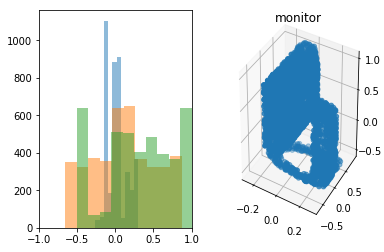

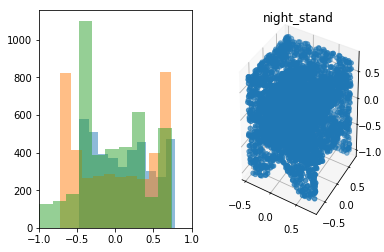

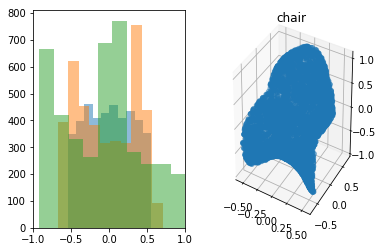

In [3]:
train_data, train_labels, test_data, test_labels = prepare_for_learning(input_dir, n = n)

In [7]:
model = build_point_net(input_shape = (n, 3), output_shape = train_labels.shape[-1])
model.compile("adadelta", "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_features (InputLayer)     (None, 4096, 3)      0                                            
__________________________________________________________________________________________________
T_net_3 (Model)                 (None, 3, 3)         799104      input_features[0][0]             
__________________________________________________________________________________________________
transformed3 (Lambda)           (None, 4096, 3)      0           input_features[0][0]             
                                                                 T_net_3[1][0]                    
__________________________________________________________________________________________________
conv10 (Conv1D)                 (None, 4096, 64)     256         transformed3[0][0]               
__________

In [ ]:
history = model.fit(train_data, train_labels,
                    epochs = epochs, batch_size = 16,
                    validation_data = (test_data, test_labels),
                    verbose = 2)

Train on 3991 samples, validate on 908 samples
Epoch 1/10
